<a href="https://colab.research.google.com/github/rsbaye/Data-Science-Projects/blob/main/Baye_latent_class_analysis_stepmix_Copy3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Latent Class Analysis with StepMix



## Introduction


In this study, we demonstrate using the StepMix package to perform a latent class analysis (LCA) or clustering analysis over various data types. Informally, LCA models assume that an unobserved discrete random variable Z (the latent class, group or cluster) can explain some observed features X, as depicted in the following graphical model :

<img src='https://drive.google.com/uc?id=1bRyxV9QNkHycf6UZ7fHnfEzEi89i83U0' width=150px>

Members of the same latent group will exhibit similar patterns in the observed data X.

Here, we perform a grid search over n_omponents to select the optimum number of groups. The serach revealed 3 clusters. We use a 15-85 split for the test and training data and compare f1-score and weighted precision, accuracy.
We impute the missing values in R using miss forest and the simple imputation technique with the most frequent as our strategy and run the model seperately on the imputed data and the data without imputation to establish gound truth.


In [ ]:
# Python imports of libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import rand_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.model_selection import cross_val_predict
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.datasets import make_classification
from sklearn.utils import resample
from sklearn.metrics import roc_curve, precision_recall_curve, auc, confusion_matrix, classification_report, adjusted_rand_score, completeness_score, homogeneity_score, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency
from stepmix.bootstrap import plot_all_parameters_CI
from stepmix.stepmix import StepMix
from scipy.stats import f_oneway
import sklearn.neighbors._base
import sys
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base



In [ ]:
pip install -U imbalanced-learn

<a name="data"></a>
## Setup the Survey Dataset

In [ ]:
data = pd.read_stata("n2.dta")
print(data.columns)

FileNotFoundError: ignored

In [ ]:
df = data[['intention', 'ind1', 'ind2', 'ind3', 'fid', 'trust']]
print(df.tail(5))

     intention  ind1  ind2  ind3  fid  trust
530        4.0   4.0   3.0   3.0  4.0    3.0
531        4.0   4.0   4.0   5.0  5.0    5.0
532        5.0   4.0   4.0   4.0  5.0    3.0
533        5.0   NaN   NaN   NaN  NaN    NaN
534        4.0   3.0   4.0   4.0  4.0    3.0


In [ ]:
#Impute using missing forest.
columns_to_impute = ['intention', 'ind1', 'ind2', 'ind3', 'fid', 'trust']
imputer = MissForest()
imputed = imputer.fit_transform(columns_to_impute)




NameError: name 'estimator' is not defined

In [ ]:
df1 = data[['intention', 'ind1', 'ind2', 'ind3', 'fid', 'trust']]
print(df1.tail(5))

     intention  ind1  ind2  ind3  fid  trust
530        4.0   4.0   3.0   3.0  4.0    3.0
531        4.0   4.0   4.0   5.0  5.0    5.0
532        5.0   4.0   4.0   4.0  5.0    3.0
533        5.0   4.0   4.0   4.0  4.0    4.0
534        4.0   3.0   4.0   4.0  4.0    3.0


In [ ]:
num_cols = df1.shape[1]
print(num_cols)


6


<a name="categorical"></a>
## LCA with Categorical Features


StepMix also supports categorical variables with more than 2 categories. Categories must be integer-encoded.

In [ ]:
#imputer = SimpleImputer(strategy='most_frequent')
#df1[['ind1', 'ind2', 'ind3', "mem", "seperate", "intention", "lsp", 'age', 'fid', 'trust', 'riskp']] = imputer.fit_transform(df1[['ind1', 'ind2', 'ind3', "mem", "seperate", "intention", "lsp", 'age', 'fid', 'trust', 'riskp']])
#data

In [ ]:
df2 = df1[['intention', 'ind1', 'ind2', 'ind3', 'fid', 'trust']]
df2.to_excel('output.xlsx', index=False)
df2

,intention,ind1,ind2,ind3,fid,trust
0,5.0,5.0,5.0,5.0,4.0,4.0
1,4.0,4.0,4.0,4.0,4.0,4.0
2,4.0,4.0,4.0,4.0,4.0,4.0
3,5.0,4.0,4.0,5.0,4.0,4.0
4,4.0,4.0,4.0,4.0,4.0,3.0
...,...,...,...,...,...,...
530,4.0,4.0,3.0,3.0,4.0,3.0
531,4.0,4.0,4.0,5.0,5.0,5.0
532,5.0,4.0,4.0,4.0,5.0,3.0
533,5.0,4.0,4.0,4.0,4.0,4.0



#encoding = {
    1.0: "Strongly Disagree",
    2.0: "Disagree",
    3.0: "Unsure",
    4.0: "Agree",
    5.0: "Strongly Agree"
#}

#df_encoded = df.replace({
    'intention': encoding,
    'ind1': encoding,
    'ind2': encoding,
    'ind3': encoding,
    'fid': encoding,
    'trust': encoding
#})

#print(df_encoded)


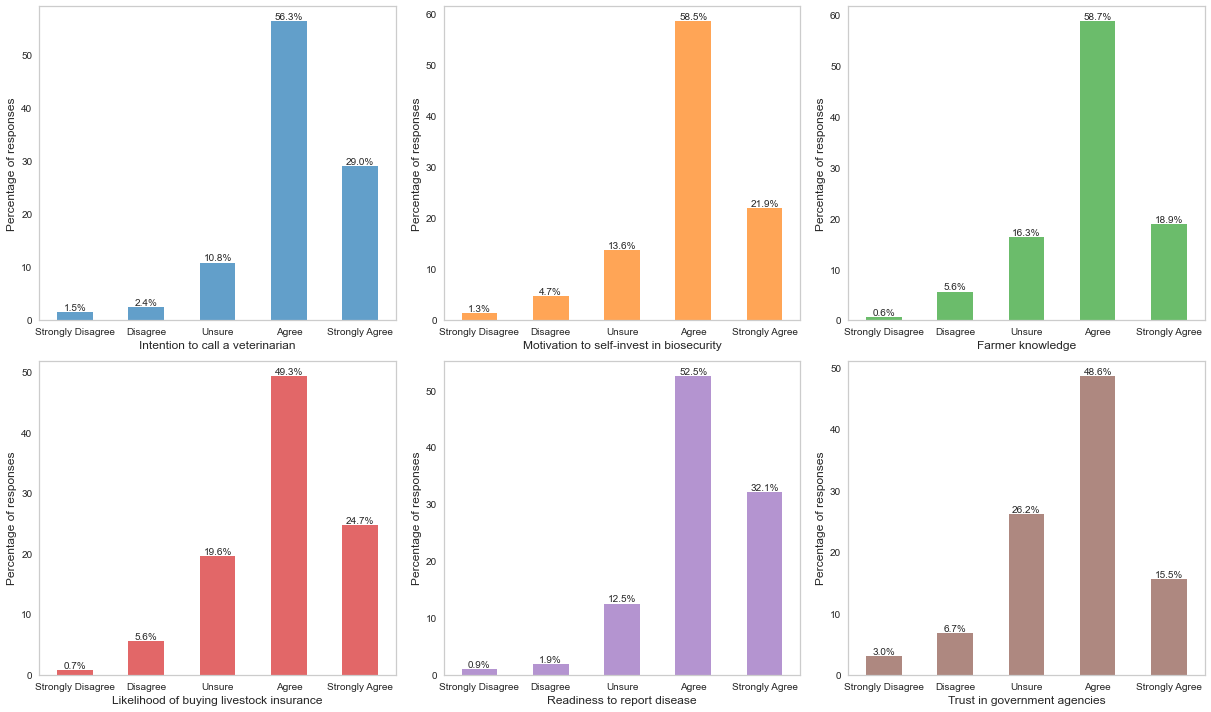

In [ ]:
df2 = df1[['intention', 'ind1', 'fid', 'ind2', 'ind3', 'trust']]

# Define the new x-axis labels
x_labels = {
    'intention': 'Intention to call a veterinarian',
    'ind1': 'Motivation to self-invest in biosecurity',
    'ind2': 'Likelihood of buying livestock insurance',
    'ind3': 'Readiness to report disease',
    'fid': 'Farmer knowledge',
    'trust': 'Trust in government agencies'
}

label_mapping = {
    1: 'Strongly Disagree',
    2: 'Disagree',
    3: 'Unsure',
    4: 'Agree',
    5: 'Strongly Agree'
}

frequencies = df2.apply(pd.Series.value_counts, normalize=True) * 100

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']


fig, axes = plt.subplots(2, 3, figsize=(17, 10))

for i, variable in enumerate(df2.columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    frequencies[variable].plot(kind='bar', ax=ax, alpha=0.7, color=colors[i])

    ax.set_xlabel(x_labels.get(variable, variable), fontsize=12)
    ax.set_ylabel('Percentage of responses', fontsize=12)
    ax.set_xticklabels([label_mapping.get(tick, tick) for tick in frequencies.index], rotation=0)

    # Add percentage values on top of each bar
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10)

    ax.grid(False)

plt.tight_layout()

plt.show()


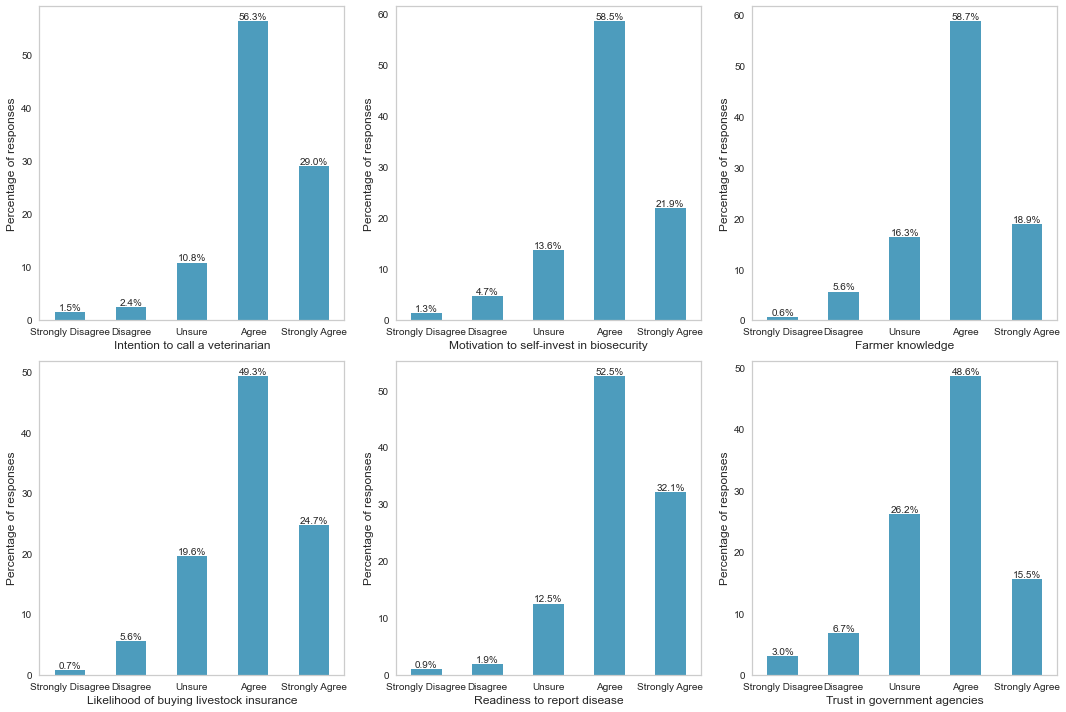

In [ ]:
df2 = df1[['intention', 'ind1', 'fid', 'ind2', 'ind3', 'trust']]

# Define the new x-axis labels
x_labels = {
    'intention': 'Intention to call a veterinarian',
    'ind1': 'Motivation to self-invest in biosecurity',
    'ind2': 'Likelihood of buying livestock insurance',
    'ind3': 'Readiness to report disease',
    'fid': 'Farmer knowledge',
    'trust': 'Trust in government agencies'
}

label_mapping = {
    1: 'Strongly Disagree',
    2: 'Disagree',
    3: 'Unsure',
    4: 'Agree',
    5: 'Strongly Agree'
}

frequencies = df2.apply(pd.Series.value_counts, normalize=True) * 100

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, variable in enumerate(df2.columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    frequencies[variable].plot(kind='bar', ax=ax, alpha=0.7)

    ax.set_xlabel(x_labels.get(variable, variable), fontsize=12)
    ax.set_ylabel('Percentage of responses', fontsize=12)
    ax.set_xticklabels([label_mapping.get(tick, tick) for tick in frequencies.index], rotation=0)

    # Add percentage values on top of each bar
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10)

    ax.grid(False)

plt.tight_layout()

plt.show()


In [ ]:
#Check for missing data
missing_values=df2.isna()
missing_values

,intention,ind1,fid,ind2,ind3,trust
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
530,False,False,False,False,False,False
531,False,False,False,False,False,False
532,False,False,False,False,False,False
533,False,False,False,False,False,False


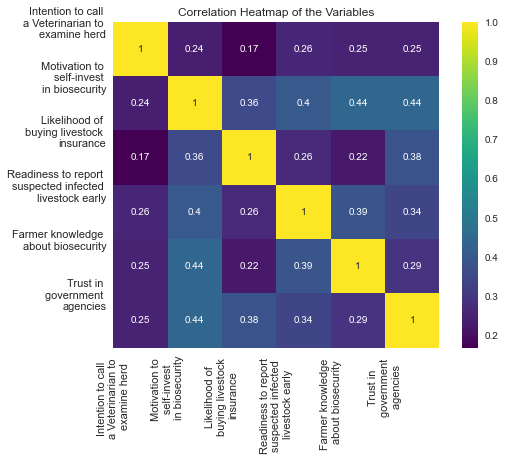

In [ ]:
#Correlation heatmap
corr_matrix = df2.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', square=True)
plt.title('Correlation Heatmap of the Variables')
plt.xticks(np.arange(len(df2.columns)), ['Intention to call \na Veterinarian to \nexamine herd', 'Motivation to \nself-invest \nin biosecurity', 'Likelihood of \nbuying livestock \ninsurance', 'Readiness to report \nsuspected infected \nlivestock early', 'Farmer knowledge \nabout biosecurity', 'Trust in \ngovernment \nagencies '], rotation=90, fontsize =11)
plt.yticks(np.arange(len(df2.columns)), ['Intention to call \na Veterinarian to \nexamine herd', 'Motivation to \nself-invest \nin biosecurity', 'Likelihood of \nbuying livestock \ninsurance', 'Readiness to report \nsuspected infected \nlivestock early', 'Farmer knowledge \nabout biosecurity', 'Trust in \ngovernment \nagencies'], rotation=360, fontsize =11)
plt.show()


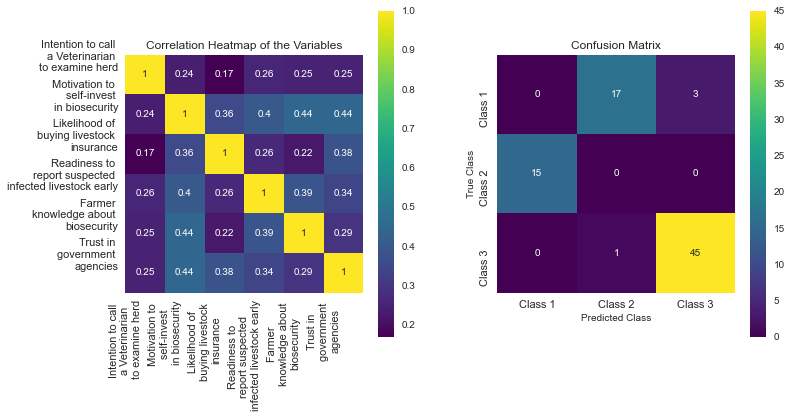

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)


fig, axes = plt.subplots(1, 2, figsize=(12, 6))

corr_matrix = df2.corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis', square=True, ax=axes[0])
axes[0].set_title('Correlation Heatmap of the Variables')
axes[0].set_xticks(np.arange(len(df2.columns)))
axes[0].set_yticks(np.arange(len(df2.columns)))
axes[0].set_xticklabels(['Intention to call \na Veterinarian \nto examine herd',
                         'Motivation to \nself-invest \nin biosecurity',
                         'Likelihood of \nbuying livestock \ninsurance',
                         'Readiness to \nreport suspected \ninfected livestock early',
                         'Farmer \nknowledge about \nbiosecurity',
                         'Trust in \ngovernment \nagencies'], rotation=90, fontsize=11)
axes[0].set_yticklabels(['Intention to call \na Veterinarian \nto examine herd',
                         'Motivation to \nself-invest \nin biosecurity',
                         'Likelihood of \nbuying livestock \ninsurance',
                         'Readiness to \nreport suspected \ninfected livestock early',
                         'Farmer \nknowledge about \nbiosecurity',
                         'Trust in \ngovernment \nagencies'], rotation=0, fontsize=11)

sns.heatmap(cm, annot=True, cmap='viridis', square=True, ax=axes[1])
axes[1].set_title('Confusion Matrix')
axes[1].set_xlabel('Predicted Class')
axes[1].set_ylabel('True Class')
axes[1].set_xticklabels(["Class 1", "Class 2", "Class 3"]
                         , rotation=0, fontsize=11)
axes[1].set_yticklabels(["Class 1", "Class 2", "Class 3"]
                         , rotation=90, fontsize=11)

plt.subplots_adjust(wspace=0.25)


plt.show()


In [ ]:

n_components_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


bic_values = []
aic_values = []

for n_components in n_components_range:
    model = StepMix(n_components=n_components, measurement="categorical", verbose=0, random_state=42, structural='gaussian_unit',n_steps=2, assignment='soft',
correction='BCH')
    model.fit(df2)
    bic_values.append(model.bic(df2))
    aic_values.append(model.aic(df2))

# Find the optimal number of components based on BIC and AIC
optimal_bic_components = np.argmin(bic_values) + 1
optimal_aic_components = np.argmin(aic_values) + 1


print("Optimal number of components based on BIC:", optimal_bic_components)
print("Optimal number of components based on AIC:", optimal_aic_components)


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.87it/s, max_LL=-3.43e+3, max_avg_LL=-6.4]

Fitting StepMix...
Fitting StepMix...



Initializations (n_init) :   0%|          | 0/1 [00:00<?, ?it/s]

Fitting StepMix...
Fitting StepMix...


Initializations (n_init) :   0%|          | 0/1 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) :   0%|          | 0/1 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) :   0%|          | 0/1 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) :   0%|          | 0/1 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) :   0%|          | 0/1 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) :   0%|          | 0/1 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.09s/it, max_LL=-3.1e+3, max_avg_LL=-5.79]

Optimal number of components based on BIC: 3
Optimal number of components based on AIC: 4


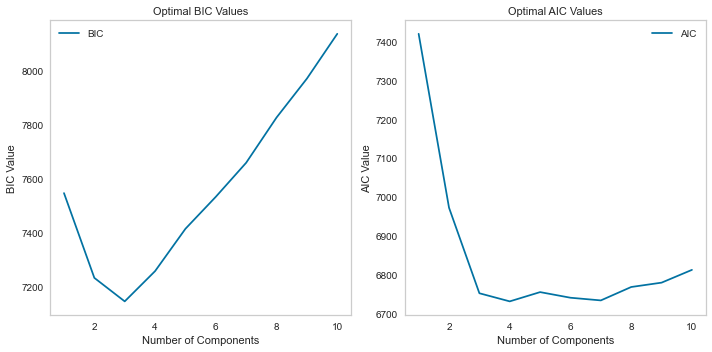

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot BIC values
ax1.plot(n_components_range, bic_values, label='BIC')
ax1.set_xlabel('Number of Components', fontsize=11)
ax1.set_ylabel('BIC Value', fontsize=11)
ax1.set_title('Optimal BIC Values', fontsize=11)
ax1.legend()
ax1.grid(False)

# Plot AIC values
ax2.plot(n_components_range, aic_values, label='AIC')
ax2.set_xlabel('Number of Components', fontsize=11)
ax2.set_ylabel('AIC Value', fontsize=11)
ax2.set_title('Optimal AIC Values', fontsize=11)
ax2.legend()
ax2.grid(False)

plt.tight_layout()
plt.show()


In [ ]:
model = StepMix(n_components=3, measurement="categorical", verbose=1, random_state=123)
model.fit(df2)

df2["categorical_pred"] = model.predict(df2)

Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  6.49it/s, max_LL=-3.28e+3, max_avg_LL=-6.14]

Fitting StepMix...
MODEL REPORT
    Measurement model parameters
        ------------------------------------------------------------------------
        Multinoulli model with 6 features, each with 6 possible outcomes
        ------------------------------------------------------------------------
        Columns 1 to 6 are associated with the first feature,
        columns 7 to 12 are associated with the second feature, etc.

        Class 1 : [0.0000 0.0076 0.0048 0.0703 0.6892 0.2281 0.0000 0.0036 0.0106 0.0707
 0.8539 0.0613 0.0000 0.0000 0.0285 0.1006 0.7650 0.1059 0.0000 0.0000
 0.0088 0.1503 0.6632 0.1777 0.0000 0.0035 0.0000 0.0833 0.6933 0.2200
 0.0000 0.0063 0.0303 0.2469 0.6549 0.0616]
        Class 2 : [0.0000 0.0412 0.0096 0.0145 0.2500 0.6847 0.0000 0.0262 0.0000 0.0000
 0.1082 0.8656 0.0000 0.0093 0.0378 0.0569 0.3947 0.5013 0.0000 0.0093
 0.0342 0.0641 0.2372 0.6552 0.0000 0.0203 0.0000 0.0000 0.0971 0.8826
 0.0000 0.0000 0.0000 0.0801 0.3782 0.5417]
        Class 3 : 


<ipython-input-78-e34d21b95701>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["categorical_pred"] = model.predict(df2)


In [ ]:

model = StepMix(n_components = 3, measurement = "categorical", verbose = 1, random_state = 42, structural='gaussian_unit',n_steps=2, assignment='soft',
correction='BCH')
model.fit(df2)

# Class predictions
df2["categorical_pred"] = model.predict(df2)

Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 30.57it/s, max_LL=-3.33e+3, max_avg_LL=-6.22]

Fitting StepMix...
MODEL REPORT
    Measurement model parameters
        ------------------------------------------------------------------------
        Multinoulli model with 7 features, each with 6 possible outcomes
        ------------------------------------------------------------------------
        Columns 1 to 6 are associated with the first feature,
        columns 7 to 12 are associated with the second feature, etc.

        Class 1 : [0.0000 0.0500 0.0100 0.0100 0.2100 0.7200 0.0000 0.0300 0.0000 0.0000
 0.0600 0.9100 0.0000 0.0100 0.0500 0.0600 0.3700 0.5100 0.0000 0.0100
 0.0400 0.0600 0.2200 0.6700 0.0000 0.0200 0.0000 0.0000 0.0900 0.8900
 0.0000 0.0000 0.0000 0.0800 0.3400 0.5800 0.0000 1.0000 0.0000 0.0000
 0.0000 0.0000]
        Class 2 : [0.0000 0.0094 0.1038 0.3208 0.4811 0.0849 0.0000 0.0283 0.2075 0.4811
 0.2358 0.0472 0.0000 0.0189 0.1509 0.4623 0.2358 0.1321 0.0000 0.0283
 0.2264 0.4528 0.2453 0.0472 0.0000 0.0189 0.0943 0.3679 0.4528 0.0660
 0.0000 0.1415 0.25


<ipython-input-79-41a096edf47e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["categorical_pred"] = model.predict(df2)


In [ ]:
variance = np.var(df2["categorical_pred"])
variance

0.6186531574810035

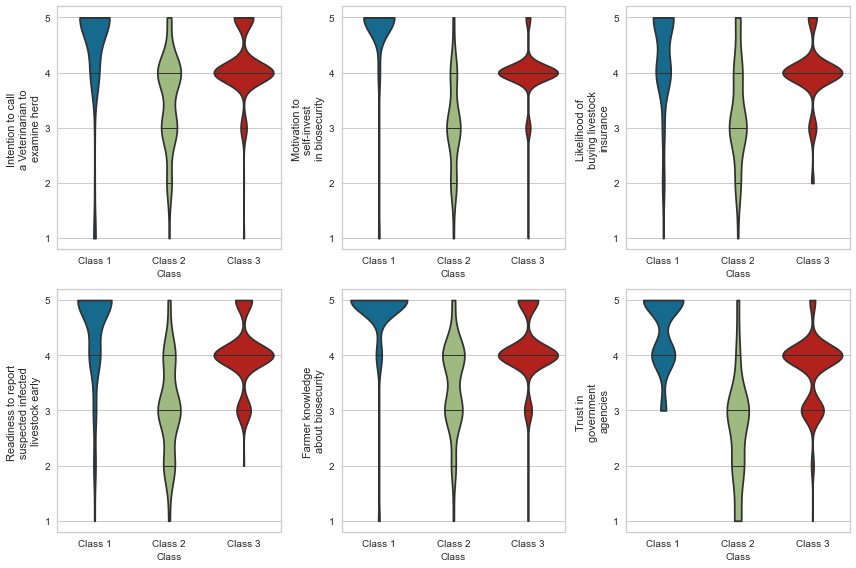

In [ ]:

class_labels = ['Class 1', 'Class 2', 'Class 3']
y_labels = ['Intention to call \na Veterinarian to \nexamine herd',
            'Motivation to \nself-invest \nin biosecurity',
            'Likelihood of \nbuying livestock \ninsurance',
            'Readiness to report \nsuspected infected \nlivestock early',
            'Farmer knowledge \nabout biosecurity',
            'Trust in \ngovernment \nagencies']


fig, axes = plt.subplots(2, 3, figsize=(12, 8))

axes = axes.flatten()

for i, variable in enumerate(df2.columns):
    if variable != 'categorical_pred':
        ax = sns.violinplot(x='categorical_pred', cut=0, inner="stick", y=variable, data=df2, ax=axes[i])
        ax.set_xticklabels(class_labels)
        ax.set_xlabel('Class')
        ax.set_ylabel(y_labels[i], rotation=90, fontsize=11)
        ax.set_yticks(range(1, 6))

plt.tight_layout()

plt.show()


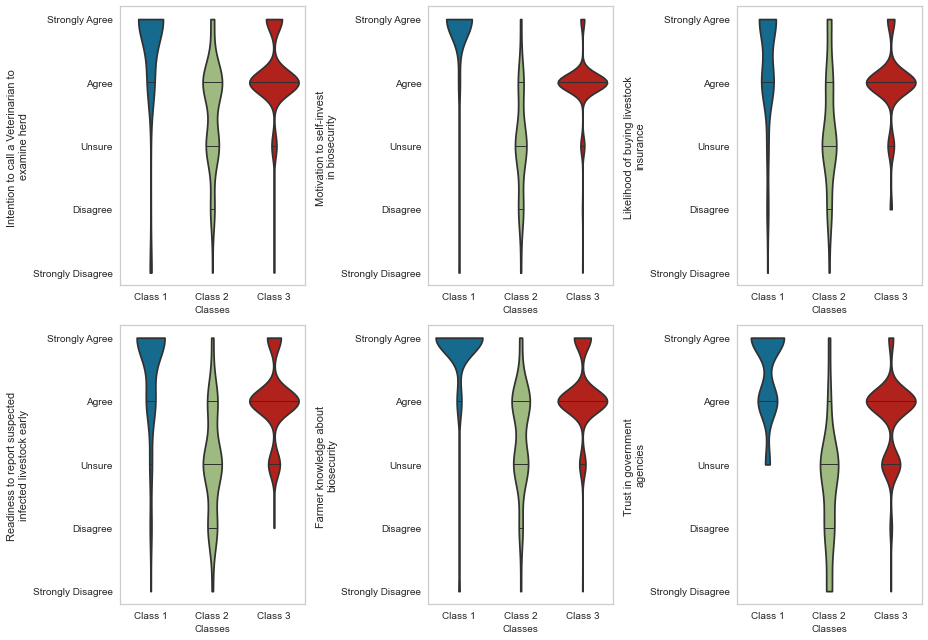

In [ ]:
class_labels = ['Class 1', 'Class 2', 'Class 3']
y_labels = ['Intention to call a Veterinarian to \nexamine herd',
            'Motivation to self-invest \nin biosecurity',
            'Likelihood of buying livestock \ninsurance',
            'Readiness to report suspected \ninfected livestock early',
            'Farmer knowledge about \nbiosecurity',
            'Trust in government \nagencies']

label_mapping = {
    1: 'Strongly Disagree',
    2: 'Disagree',
    3: 'Unsure',
    4: 'Agree',
    5: 'Strongly Agree'
}

fig, axes = plt.subplots(2, 3, figsize=(13, 9))
fig.subplots_adjust(wspace=0.5, hspace=0.3)
axes = axes.flatten()

for i, variable in enumerate(df2.columns):
    if variable != 'categorical_pred':
        ax = sns.violinplot(x='categorical_pred', cut=0, inner="stick", y=variable, data=df2, ax=axes[i])
        ax.set_xticklabels(class_labels)
        ax.set_xlabel('Classes')
        ax.set_ylabel(y_labels[i], rotation=90, fontsize=11)
        ax.set_yticks(range(1, 6))
        ax.set_yticklabels([label_mapping.get(tick) for tick in range(1, 6)])
        ax.grid(False)

plt.tight_layout()

plt.show()


In [ ]:
class_1_data = df2[df2['categorical_pred'] == 0]
class_2_data = df2[df2['categorical_pred'] == 1]
class_3_data = df2[df2['categorical_pred'] == 2]

variables = ['intention', 'ind1', 'fid', 'ind2', 'ind3', 'trust']
for variable in variables:
    f_value, p_value = f_oneway(class_1_data[variable], class_2_data[variable], class_3_data[variable])
    print(f"ANOVA test result for {variable}: F-value = {f_value:.4f}, p-value = {p_value:.4f}")


ANOVA test result for intention: F-value = 52.0175, p-value = 0.0000
ANOVA test result for ind1: F-value = 243.2916, p-value = 0.0000
ANOVA test result for fid: F-value = 47.3642, p-value = 0.0000
ANOVA test result for ind2: F-value = 126.8879, p-value = 0.0000
ANOVA test result for ind3: F-value = 160.3270, p-value = 0.0000
ANOVA test result for trust: F-value = 154.2232, p-value = 0.0000


The coefficients are significant indicating there are statistical difference across the 3 classes. Now we can implement a post0hoc analysis to see where those differences are by performing pairwise comparisons.

Using the Yukey Honestly Significant Diffference test (HSD), test where the differences are.

In [ ]:
variables = ['intention', 'ind1', 'fid', 'ind2', 'ind3', 'trust']
group_labels = df2['categorical_pred'].astype(str)

for variable in variables:
    tukey_result = pairwise_tukeyhsd(df2[variable], group_labels)
    print(f"Pairwise comparisons for {variable}:")
    print(tukey_result.summary())
    print()


Pairwise comparisons for intention:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  -1.0009 0.001 -1.2356 -0.7662   True
     0      2  -0.3889 0.001 -0.5811 -0.1966   True
     1      2    0.612 0.001  0.4225  0.8015   True
---------------------------------------------------

Pairwise comparisons for ind1:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  -1.7886 0.001 -1.9792  -1.598   True
     0      2  -0.8847 0.001 -1.0408 -0.7285   True
     1      2   0.9039 0.001    0.75  1.0578   True
---------------------------------------------------

Pairwise comparisons for fid:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  -0

In [ ]:
df2.to_excel('ot.xlsx', index=False)

In [ ]:
params = model.get_parameters()
params["weights"]

array([0.1998, 0.2092, 0.5910])

In [ ]:
params["measurement"].keys()

dict_keys(['pis'])

In [ ]:
params["measurement"]["pis"]

array([[0.0000, 0.0414, 0.0095, 0.0000, 0.2682, 0.6809, 0.0000, 0.0161,
        0.0000, 0.0000, 0.1225, 0.8615, 0.0000, 0.0093, 0.0373, 0.0577,
        0.4056, 0.4901, 0.0000, 0.0000, 0.0235, 0.0663, 0.2434, 0.6667,
        0.0000, 0.0000, 0.0000, 0.0000, 0.1058, 0.8942, 0.0000, 0.0000,
        0.0000, 0.0809, 0.3876, 0.5315],
       [0.0000, 0.0107, 0.0922, 0.3146, 0.4831, 0.0994, 0.0000, 0.0364,
        0.1933, 0.4444, 0.2679, 0.0580, 0.0000, 0.0179, 0.1520, 0.4278,
        0.2553, 0.1470, 0.0000, 0.0357, 0.2189, 0.4415, 0.2515, 0.0524,
        0.0000, 0.0357, 0.0894, 0.3579, 0.4444, 0.0726, 0.0000, 0.1222,
        0.2309, 0.4625, 0.1111, 0.0733],
       [0.0000, 0.0075, 0.0053, 0.0721, 0.6903, 0.2248, 0.0000, 0.0038,
        0.0107, 0.0736, 0.8537, 0.0582, 0.0000, 0.0000, 0.0285, 0.1042,
        0.7656, 0.1017, 0.0000, 0.0000, 0.0095, 0.1534, 0.6636, 0.1735,
        0.0000, 0.0032, 0.0000, 0.0852, 0.6956, 0.2160, 0.0000, 0.0074,
        0.0321, 0.2517, 0.6519, 0.0569]])

In [ ]:
print(params["measurement"]["pis"].shape)
print((model.n_components, df2.shape[1]))

(3, 36)
(3, 7)


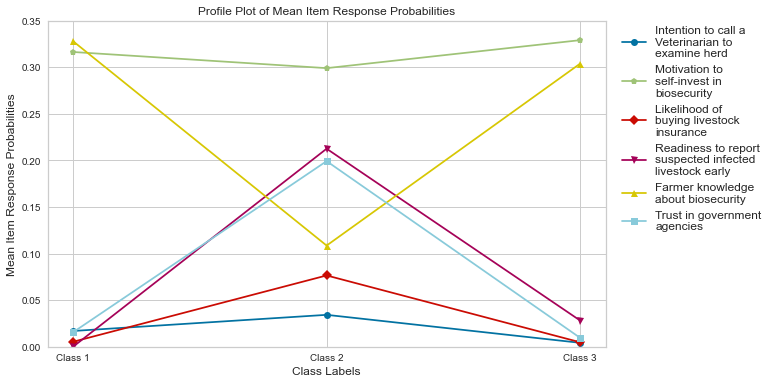

In [ ]:

class_labels = ['Class 1', 'Class 2', 'Class 3']
item_labels = ['Intention to call a\nVeterinarian to\nexamine herd',
               'Motivation to\nself-invest in\nbiosecurity',
               'Likelihood of\nbuying livestock\ninsurance',
               'Readiness to report\nsuspected infected\nlivestock early',
               'Farmer knowledge\nabout biosecurity',
               'Trust in government\nagencies']


probabilities = np.array([[0.016966667, 0.0343, 0.004266667],
                          [0.316366667, 0.299033333, 0.329066667],
                          [0.005366667, 0.076566667, 0.004833333],
                          [0, 0.212566667, 0.0281],
                          [0.328, 0.108633333, 0.303966667],
                          [0.015533333, 0.199233333, 0.0095]])

# Create the plot
plt.figure(figsize=(10, 6))

markers = ['o', 'p', 'D', 'v', '^', 's']

for i in range(len(item_labels)):
    plt.plot(range(len(class_labels)), probabilities[i], marker=markers[i], label=item_labels[i])

plt.xlabel('Class Labels', fontsize=12)
plt.ylabel('Mean Item Response Probabilities', fontsize=12)
plt.title('Profile Plot of Mean Item Response Probabilities', fontsize=12)

plt.xticks(range(len(class_labels)), class_labels)

plt.ylim(0, 0.35)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0., fontsize=12)

plt.show()


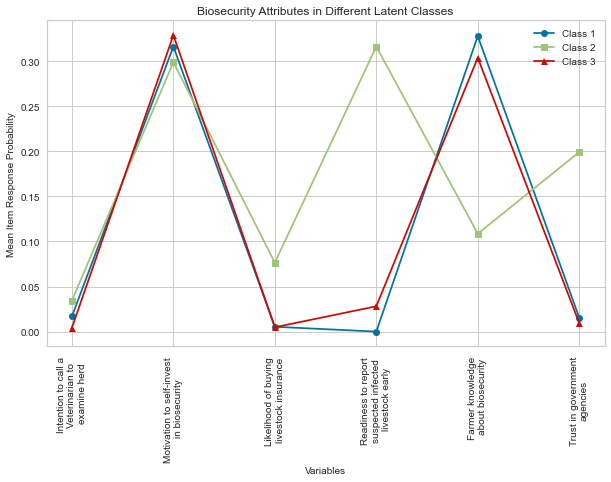

In [ ]:
categories = ['Intention to call a \nVeterinarian to \nexamine herd',
              'Motivation to self-invest \nin biosecurity',
              'Likelihood of buying \nlivestock insurance',
              'Readiness to report \nsuspected infected \nlivestock early',
              'Farmer knowledge \nabout biosecurity',
              'Trust in government \nagencies']

class_1 = [0.016966667, 0.316366667, 0.005366667, 0, 0.328, 0.015533333]
class_2 = [0.0343, 0.299033333, 0.076566667, 0.316366667, 0.108633333, 0.199233333]
class_3 = [0.004266667, 0.329066667, 0.004833333, 0.0281, 0.303966667, 0.0095]

plt.figure(figsize=(10, 6))

plt.plot(categories, class_1, marker='o', label='Class 1')
plt.plot(categories, class_2, marker='s', label='Class 2')
plt.plot(categories, class_3, marker='^', label='Class 3')

plt.xlabel('Variables')
plt.ylabel('Mean Item Response Probability')
plt.title('Biosecurity Attributes in Different Latent Classes')
plt.legend()
plt.xticks(rotation=90)

plt.show()


In [ ]:
pd.crosstab(df2['ind1'], df2['categorical_pred'], normalize='index').mul(100).round(2)

categorical_pred,0,1,2
ind1,,,
1.0,28.57,57.14,14.29
2.0,0.00,88.00,12.00
3.0,0.00,69.86,30.14
4.0,2.56,7.67,89.78
5.0,79.49,5.13,15.38


In [ ]:
# Calculate the rand score
rand_score(df2['ind1'], df2['categorical_pred'])

0.7867408729742028

In [ ]:
# Calculate the Fowlkes-Mallows Index
fowlkes_mallows_index = metrics.fowlkes_mallows_score(df2['ind1'], df2['categorical_pred'])

print("Fowlkes-Mallows Index:", fowlkes_mallows_index)

Fowlkes-Mallows Index: 0.7512158779341718


In [ ]:
pd.crosstab(df2['ind2'], df2['categorical_pred'], normalize='index').mul(100).round(2)

categorical_pred,0,1,2
ind2,,,
1.0,0.00,100.00,0.00
2.0,10.00,83.33,6.67
3.0,8.57,45.71,45.71
4.0,9.09,9.47,81.44
5.0,50.76,3.79,45.45


In [ ]:
rand_score(df2['ind2'], df2['categorical_pred'])

0.6325457663901431

In [ ]:
# Calculate the Fowlkes-Mallows Index
fowlkes_mallows_index = metrics.fowlkes_mallows_score(df2['ind2'], df2['categorical_pred'])

print("Fowlkes-Mallows Index:", fowlkes_mallows_index)

Fowlkes-Mallows Index: 0.5391786528731433


In [ ]:
pd.crosstab(df2['ind3'], df2['categorical_pred'], normalize='index').mul(100).round(2)

categorical_pred,0,1,2
ind3,,,
1.0,0.00,80.00,20.00
2.0,0.00,100.00,0.00
3.0,0.00,56.72,43.28
4.0,3.20,17.08,79.72
5.0,54.65,4.07,41.28


In [ ]:
rand_score(df2['ind3'], df2['categorical_pred'])

0.6392453358535476

In [ ]:
# Calculate the Fowlkes-Mallows Index
fowlkes_mallows_index = metrics.fowlkes_mallows_score(df2['ind3'], df2['categorical_pred'])

print("Fowlkes-Mallows Index:", fowlkes_mallows_index)

Fowlkes-Mallows Index: 0.5712072269524227


In [ ]:
pd.crosstab(df2['fid'], df2['categorical_pred'], normalize='index').mul(100).round(2)

categorical_pred,0,1,2
fid,,,
1.0,33.33,66.67,0.00
2.0,16.67,53.33,30.00
3.0,6.90,55.17,37.93
4.0,12.74,7.64,79.62
5.0,50.50,16.83,32.67


In [ ]:
rand_score(df2['fid'], df2['categorical_pred'])

0.6497742308096188

In [ ]:

# Calculate the Fowlkes-Mallows Index
fowlkes_mallows_index = metrics.fowlkes_mallows_score(df2['fid'], df2['categorical_pred'])

print("Fowlkes-Mallows Index:", fowlkes_mallows_index)

Fowlkes-Mallows Index: 0.590283865530657


In [ ]:
pd.crosstab(df2['trust'], df2['categorical_pred'], normalize='index').mul(100).round(2)

categorical_pred,0,1,2
trust,,,
1.0,0.00,87.50,12.50
2.0,0.00,75.00,25.00
3.0,5.71,35.00,59.29
4.0,14.23,3.46,82.31
5.0,69.88,9.64,20.48


In [ ]:
rand_score(df2["trust"], df2["categorical_pred"])

0.6476250481290909

In [ ]:
# Calculate the Fowlkes-Mallows Index
fowlkes_mallows_index = metrics.fowlkes_mallows_score(df2['trust'], df2['categorical_pred'])

print("Fowlkes-Mallows Index:", fowlkes_mallows_index)

Fowlkes-Mallows Index: 0.5528250408751879


In [ ]:
pd.crosstab(df2['intention'], df2['categorical_pred'], normalize='index').mul(100).round(2)

categorical_pred,0,1,2
intention,,,
1.0,62.50,12.50,25.00
2.0,7.69,84.62,7.69
3.0,0.00,62.07,37.93
4.0,8.64,16.28,75.08
5.0,45.81,6.45,47.74


In [ ]:
rand_score(df2['intention'], df2['categorical_pred'])

0.6062165284049145

In [ ]:
# Calculate the Fowlkes-Mallows Index
fowlkes_mallows_index = metrics.fowlkes_mallows_score(df2['intention'], df2['categorical_pred'])

print("Fowlkes-Mallows Index:", fowlkes_mallows_index)

Fowlkes-Mallows Index: 0.5409126647131961


In [ ]:
measurement_features = ['intention', 'ind1', 'fid', 'ind2', 'ind3', 'trust']
#Model validation using train_test split
X_train, X_test, y_train, y_test = train_test_split(df2[measurement_features], df2['categorical_pred'], test_size=0.15, random_state=42)

model = StepMix(n_components = 3, measurement = "categorical", verbose = 1, random_state = 42, structural='gaussian_unit',n_steps=2, assignment='soft',
correction='BCH')

cv_scores = cross_val_score(model, X_train, y_train, cv=3)

print("Cross-Validation Scores:")
print(cv_scores)
print("Mean CV Score:", cv_scores.mean())


model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

test_report = classification_report(y_test, y_test_pred)
train_report = classification_report(y_train, y_train_pred)


print("\nTraining Data Metrics:")
print(train_report)
print("\nTesting Data Metrics:")
print(test_report)

# Compute precision and recall for each class
precision = dict()
recall = dict()
for class_label in range(model.n_components):
    binary_y_test = np.where(y_test == class_label, 1, 0)
    binary_y_test_pred = np.where(y_test_pred == class_label, 1, 0)
    precision[class_label], recall[class_label], _ = precision_recall_curve(binary_y_test, binary_y_test_pred)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)


Initializations (n_init) :   0%|          | 0/1 [00:00<?, ?it/s]

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 45.39it/s, max_LL=-2.08e+3, max_avg_LL=-6.88]

Fitting StepMix...



Initializations (n_init) :   0%|          | 0/1 [00:00<?, ?it/s]

MODEL REPORT
    Measurement model parameters
        ------------------------------------------------------------------------
        Multinoulli model with 6 features, each with 6 possible outcomes
        ------------------------------------------------------------------------
        Columns 1 to 6 are associated with the first feature,
        columns 7 to 12 are associated with the second feature, etc.

        Class 1 : [0.0000 0.0532 0.0179 0.0000 0.1843 0.7447 0.0000 0.0489 0.0000 0.0000
 0.0514 0.8998 0.0000 0.0178 0.0368 0.0509 0.3137 0.5808 0.0000 0.0177
 0.0143 0.0565 0.1767 0.7348 0.0000 0.0177 0.0000 0.0000 0.0559 0.9264
 0.0000 0.0000 0.0000 0.0713 0.3637 0.5650]
        Class 2 : [0.0000 0.0102 0.0059 0.0766 0.6781 0.2293 0.0000 0.0061 0.0050 0.0912
 0.8496 0.0481 0.0000 0.0000 0.0200 0.1070 0.7497 0.1233 0.0000 0.0000
 0.0061 0.1635 0.6513 0.1791 0.0000 0.0000 0.0000 0.0999 0.7147 0.1854
 0.0000 0.0058 0.0295 0.2616 0.6355 0.0675]
        Class 3 : [0.0000 0.0000 0.10

Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  6.06it/s, max_LL=-1.85e+3, max_avg_LL=-6.1]


Fitting StepMix...
MODEL REPORT
    Measurement model parameters
        ------------------------------------------------------------------------
        Multinoulli model with 6 features, each with 6 possible outcomes
        ------------------------------------------------------------------------
        Columns 1 to 6 are associated with the first feature,
        columns 7 to 12 are associated with the second feature, etc.

        Class 1 : [0.0000 0.0660 0.0000 0.0719 0.2620 0.6001 0.0000 0.0331 0.0182 0.0000
 0.0988 0.8499 0.0000 0.0166 0.0167 0.0754 0.3956 0.4958 0.0000 0.0000
 0.0727 0.0000 0.2270 0.7003 0.0000 0.0497 0.0166 0.0000 0.0571 0.8767
 0.0000 0.0000 0.0000 0.1205 0.3449 0.5346]
        Class 2 : [0.0000 0.0193 0.0628 0.2836 0.5335 0.1009 0.0000 0.0000 0.1566 0.4070
 0.3829 0.0535 0.0000 0.0000 0.1390 0.5122 0.2449 0.1039 0.0000 0.0000
 0.1630 0.3860 0.3704 0.0806 0.0000 0.0000 0.0513 0.3518 0.5087 0.0882
 0.0000 0.0769 0.2697 0.5285 0.0824 0.0425]
        Class 3 : 

Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 79.14it/s, max_LL=-3.2e+3, max_avg_LL=-7.05]



MODEL REPORT
    Measurement model parameters
        ------------------------------------------------------------------------
        Multinoulli model with 6 features, each with 6 possible outcomes
        ------------------------------------------------------------------------
        Columns 1 to 6 are associated with the first feature,
        columns 7 to 12 are associated with the second feature, etc.

        Class 1 : [0.0000 0.0292 0.1074 0.2669 0.4968 0.0997 0.0000 0.0000 0.1952 0.4120
 0.3131 0.0798 0.0000 0.0000 0.1804 0.4141 0.2797 0.1257 0.0000 0.0000
 0.1928 0.5289 0.2783 0.0000 0.0000 0.0000 0.0614 0.3014 0.5602 0.0770
 0.0000 0.0676 0.2259 0.5563 0.0895 0.0607]
        Class 2 : [0.0000 0.0180 0.0366 0.0726 0.1840 0.6887 0.0000 0.0550 0.0000 0.0000
 0.1110 0.8340 0.0000 0.0183 0.0184 0.0000 0.3531 0.6101 0.0000 0.0549
 0.0630 0.0670 0.2282 0.5869 0.0000 0.0549 0.0183 0.0000 0.0419 0.8849
 0.0000 0.0000 0.0185 0.0304 0.3629 0.5882]
        Class 3 : [0.0000 0.0061 0.0

NameError: name 'thresh' is not defined

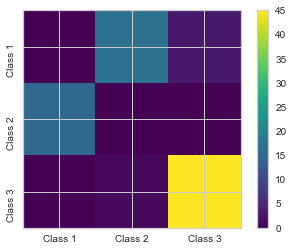

In [ ]:
# Plot confusion matrix
plt.imshow(cm, cmap='viridis')

cbar = plt.colorbar()

tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=0)
plt.yticks(tick_marks, class_labels, rotation=90)

# Add value annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, f'{cm[i, j]}', ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.title("Confusion Matrix", fontsize=11)
plt.xlabel("Predicted Class", fontsize=11)
plt.ylabel("True Class", fontsize=11)
plt.tight_layout()
plt.grid(False)
plt.show()


In [ ]:
item_labels = [
    'Intention to call a Veterinarian to examine herd',
    'Motivation to self-invest in biosecurity',
    'Likelihood of buying livestock insurance',
    'Readiness to report suspected infected livestock early',
    'Farmer knowledge about biosecurity',
    'Trust in government agencies'
]

class_labels = ['Class 1', 'Class 2', 'Class 3']

probabilities = [
    [0.023066667, 0.310266667, 0.017133333],
    [0.3162, 0.04545, 0.303],
    [0.022766667, 0.139, 0.1943],
    [0.142833333, 0.1962, 0.158133333],
    [0.169533333, 0.118366667, 0.290233333],
    [0.100466667, 0.232866667, 0.289633333]
]

plt.figure(figsize=(10, 6))

for i in range(len(item_labels)):
    plt.plot(range(len(class_labels)), probabilities[i], marker='o', label=item_labels[i])

plt.xlabel('Class Labels')
plt.ylabel('Mean Item Response Probabilities')

plt.title('Profile Plot of Mean Item Response Probabilities')

plt.xticks(range(len(class_labels)), class_labels)

plt.ylim(0, 0.35)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)

plt.show()


In [ ]:
item_labels = [
    'Intention to call a Veterinarian to examine herd',
    'Motivation to self-invest in biosecurity',
    'Likelihood of buying livestock insurance',
    'Readiness to report suspected infected livestock early',
    'Farmer knowledge about biosecurity',
    'Trust in government agencies'
]

class_labels = ['Class 1', 'Class 2', 'Class 3']

probabilities = [
    [0.050833333, 0.2825, 0.066466667],
    [0.266866667, 0.070566667, 0.262766667],
    [0.1227, 0.2106, 0.283833333],
    [0.073433333, 0.287966667, 0.021433333],
    [0.005133333, 0.442333333, 0.023366667],
    [0.309966667, 0.135566667, 0.1919]
]

plt.figure(figsize=(10, 6))

for i in range(len(item_labels)):
    plt.plot(range(len(class_labels)), probabilities[i], marker='o', label=item_labels[i])

plt.xlabel('Class Labels')
plt.ylabel('Mean Item Response Probabilities')

plt.title('Profile Plot of Mean Item Response Probabilities')

plt.xticks(range(len(class_labels)), class_labels)

plt.ylim(0, 0.5)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)

plt.show()


In [ ]:

item_labels = [
    'Intention to call a Veterinarian to examine herd',
    'Motivation to self-invest in biosecurity',
    'Likelihood of buying livestock insurance',
    'Readiness to report suspected infected livestock early',
    'Farmer knowledge about biosecurity',
    'Trust in government agencies'
]

class_labels = ['Class 1', 'Class 2', 'Class 3']

probabilities = [
    [0.035966667, 0.297366667, 0.072133333],
    [0.2612, 0.082666667, 0.250666667],
    [0.036466667, 0.1837, 0.280733333],
    [0.0794, 0.277433333, 0.0254],
    [0.054266667, 0.279066667, 0.142633333],
    [0.3294, 0.145233333, 0.1841]
]

plt.figure(figsize=(10, 6))

for i in range(len(item_labels)):
    plt.plot(range(len(class_labels)), probabilities[i], marker='o', label=item_labels[i])


plt.xlabel('Class Labels')
plt.ylabel('Mean Item Response Probabilities')

plt.title('Profile Plot of Mean Item Response Probabilities')

plt.xticks(range(len(class_labels)), class_labels)

plt.ylim(0, 0.4)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)

plt.show()


In [ ]:
categorical_columns = ['intention', 'ind1', 'ind2', 'ind3', 'fid', 'trust']

for column in categorical_columns:
    original_proportions = df[column].value_counts(normalize=True)
    imputed_proportions = df2[column].value_counts(normalize=True)

    proportions_df = pd.DataFrame({
        'Original Data': original_proportions,
        'Imputed Data': imputed_proportions
    })

    proportions_df.plot(kind='bar', figsize=(10, 4))
    plt.title(column)
    plt.xlabel('Categories')
    plt.ylabel('Proportion')
    plt.legend()

    contingency_table = pd.crosstab(df[column], df2[column])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square test result for {column}: p-value = {p_value}")

    plt.show()


In [ ]:
categorical_columns = ['intention', 'ind1', 'ind2', 'ind3', 'fid', 'trust']

doc = Document()

# Iterate over the categorical columns
for column in categorical_columns:
    # Compute original and imputed proportions
    original_proportions = df[column].value_counts(normalize=True)
    imputed_proportions = df2[column].value_counts(normalize=True)


    proportions_df = pd.DataFrame({
        'Original Data': original_proportions,
        'Imputed Data': imputed_proportions
    })

    proportions_df.plot(kind='bar', figsize=(10, 4))

    plt.xlabel('Categories')
    plt.ylabel('Proportion')
    plt.legend()

    contingency_table = pd.crosstab(df[column], df2[column])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square test result for {column}: p-value = {p_value}")

    plt.savefig(f"{column}_plot.png")

    doc.add_paragraph(f"Chi-square test result for {column}: p-value = {p_value}")
    doc.add_picture(f"{column}_plot.png", width=Inches(6), height=Inches(3))
    doc.add_paragraph('\n')

    plt.clf()

doc.save("plots.docx")

In [ ]:
#Read the origical data with dropped missing observations.
dat = pd.read_excel("output.xlsx")

In [ ]:
#Estimate the latent class model for the original data
model = StepMix(n_components = 3, measurement = "categorical", verbose = 1, random_state = 42, structural='gaussian_unit',n_steps=2, assignment='soft',
correction='BCH')
model.fit(dat)
dat["categorical_pred"] = model.predict(dat)

Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  8.70it/s, max_LL=-2.95e+3, max_avg_LL=-6.28]

Fitting StepMix...
MODEL REPORT
    Measurement model parameters
        ------------------------------------------------------------------------
        Multinoulli model with 6 features, each with 6 possible outcomes
        ------------------------------------------------------------------------
        Columns 1 to 6 are associated with the first feature,
        columns 7 to 12 are associated with the second feature, etc.

        Class 1 : [0.0000 0.0114 0.0890 0.2876 0.5086 0.1034 0.0000 0.0000 0.2082 0.4656
 0.2917 0.0345 0.0000 0.0099 0.2092 0.4567 0.2791 0.0451 0.0000 0.0000
 0.0688 0.3662 0.4846 0.0805 0.0000 0.0000 0.1681 0.4564 0.2489 0.1266
 0.0000 0.1257 0.2772 0.4989 0.0526 0.0456]
        Class 2 : [0.0000 0.0467 0.0096 0.0381 0.2347 0.6708 0.0000 0.0482 0.0000 0.0000
 0.1269 0.8249 0.0000 0.0193 0.0441 0.0586 0.2462 0.6317 0.0000 0.0386
 0.0197 0.0000 0.1004 0.8413 0.0000 0.0289 0.0545 0.0568 0.3377 0.5220
 0.0000 0.0097 0.0000 0.0926 0.3337 0.5640]
        Class 3 : 

In [ ]:
#Determine if there is any statistical difference between the to models with a chi-square test.
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(dat["categorical_pred"], df2["categorical_pred"])

chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("p-value:", p_value)


p-value: 0.69666304013716


We perform a chi-square test to check if there is any signficant difference between the imputed data and the original data. Since the p_value is great than 5%, we conclude that there is no significant difference between the imputed data and the origical data.